In [29]:
import numpy as np
from matplotlib import pyplot as plt
from helper import get_data

In [30]:
%matplotlib inline

In [31]:
x1, x2, x3 = get_data()

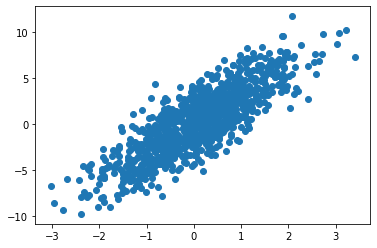

In [32]:
plt.scatter(x1, x3)

In [34]:
from scipy.stats import norm, multivariate_normal

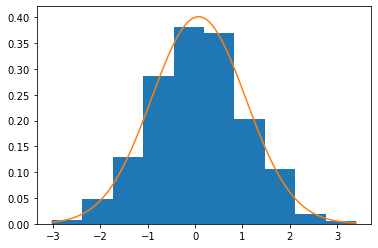

In [46]:
_ = plt.hist(x1, bins=10, density=True)
x1.mean(), x1.std()

xs = np.linspace(x1.min(), x1.max(), 100)

pdf = norm.pdf(xs, x1.mean(), x1.std())
plt.plot(xs, pdf)

In [15]:
def plot_hist_pdf(x, bins=100, density=True):
    plt.hist(x, bins=bins, density=density)
    mu = x.mean()
    sigma = x.std(ddof=1)

    xs = np.linspace(x.min(), x.max(), 100)
    pdf = norm.pdf(xs, mu, sigma)
    plt.plot(xs, pdf)


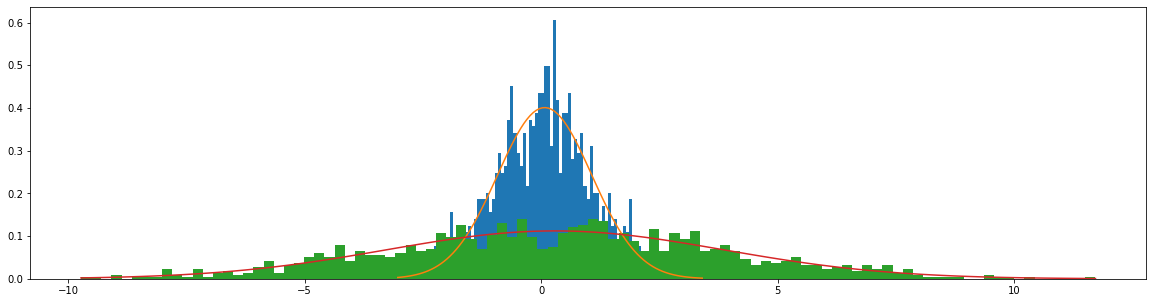

In [49]:
plt.figure(figsize=(20, 5))
plot_hist_pdf(x1)
plot_hist_pdf(x3)
# plot_hist_pdf(x3)

# Multi-variable

In [88]:
def plot_bivariate_gaussian(x1, x3):
    cov_mat = np.cov(x1, x3)
    mus = [x1.mean(), x3.mean()]
    
    # Calcula el grid
    x1_space = np.linspace(x1.min(), x1.max(), 100)
    x3_space = np.linspace(x3.min(), x3.max(), 100)
    xv, yv = np.meshgrid(x1_space, x3_space, sparse=False)
    pos = np.dstack((xv, yv))
    
    # Evalua función gaussiana
    rv = multivariate_normal(mus, cov_mat)
    mvg = rv.pdf(pos)
    
    # Grafica
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xv, yv, mvg)
    ax.view_init(elev=30., azim=0)

In [92]:
plot_bivariate_gaussian(x1, x3)

In [83]:
plt.contourf(x1_space, x2_space, mvg)